In [3]:
import numpy 
import math

# This is the specific example of the song "Delicate"
def cal_pop_fitness(Optimization_goal, population):
    # Calculating the fitness value of each solution in the current population.
    fitness = numpy.sum(-(population - Optimization_goal)**2, axis=1)
    return fitness


def mutation(offspring_X, num_mutations=1):
    for index in range(offspring_X.shape[0]):
        # Randomly choosing the indices for mutation
        mutation_indices = numpy.random.randint(low=0, high=offspring_X.shape[1], size=num_mutations)
        
        for gene_index in mutation_indices:
            # Check if the mutation index is 0 mod 4
            if gene_index % 5 == 0:
                # The random value can be from 0 to 24
                random_value = numpy.random.randint(0, 25, 1)
                # Mutate the gene using the new random value
                offspring_X[index, gene_index] = random_value
            else:
                # The random value to be added to the gene.
                random_value = numpy.random.randint(0, 13, 1)
                # Make sure the mutation results in a valid value if there are boundaries
                offspring_X[index, gene_index] = (offspring_X[index, gene_index] + random_value) % 12
    return offspring_X

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        most_fit_index = numpy.where(fitness == numpy.max(fitness))
        most_fit_index = most_fit_index[0][0]
        parents[parent_num, :] = pop[most_fit_index, :]
        fitness[most_fit_index] = -100000
    return parents



def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    X_point = numpy.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        parent1_index = k%parents.shape[0]
        parent2_index = (k+1)%parents.shape[0]
        offspring[k, 0:X_point] = parents[parent1_index, 0:X_point]
        offspring[k, X_point:] = parents[parent2_index, X_point:]
    return offspring




In [4]:
Optimization_goal = [7, 1, 5, 6, 4, 
                     8, 1, 5, 6, 4, 
                     19, 1, 4, 6, 5, 
                     6, 1, 6, 2, 5, 
                     8, 6, 5, 1, 4, 
                     8, 1, 5, 6, 4, 
                     13, 6, 5, 4, 1, 
                     17, 6, 4, 1, 5, 
                     1, 1, 5, 6, 4, 
                     1, 1, 4, 6, 4, 
                     24, 1, 6, 3, 5, 
                     13, 1, 2, 6, 4, 
                     7, 1, 4, 6, 4, 
                     3, 1, 5, 6, 4, 
                     1, 7, 2, 3, 11]


num_weights = 75

population_size = 20
mating_size = 5

pop_size = (population_size, num_weights)
new_population_gene1 = numpy.random.randint(low=0, high=24, size=(population_size, 1))
new_population_gene2 = numpy.random.randint(low=0, high=12, size=(population_size, 4))
new_population_combined = numpy.hstack((new_population_gene1, new_population_gene2))

# Loop 15 times to add 70 more columns, 5 columns at a time
for i in range(14):
    new_population_gene1a = numpy.random.randint(low=0, high=24, size=(population_size, 1))
    new_population_gene2a = numpy.random.randint(low=0, high=12, size=(population_size, 4))
    additional_genes = numpy.hstack((new_population_gene1a, new_population_gene2a))
    new_population_combined = numpy.hstack((new_population_combined, additional_genes))

    
print(new_population_combined[0:5])

[[22  5  2  4  8 13 11  0  3  2 21  4  9  0  6 15  5 10  3  5 12  8  3  3
   6  1  0  1  9  7 19  9  0  8  5  9 11  5 11 10  5  7  7  7  7 15  7  7
  10  2  8  4 10  8  9 22  7 11  9 11 12  2  3  1  4 11 10  6  4  1  9  8
   3  4  4]
 [23  4  0  0  7  7  2  7  2 10 17  3  6  1  6  9  8  7  2  4  2  9  4  3
   0  4  5 11  9  1  2 11  0  5  8  9  6  5 11  9  2  4  8  2  1  5  7  1
   1  9 16  7  0  4 11 23 11  8  5  1  1 11  9  4  0 14  4 11  9  0 23  4
   7  0  5]
 [22  7 11  8  8 12  5  6  9  1  4  3  4  6  7 19  0  5  5  3 23  0  2  1
   1  5  7  2  9  8 21 10  3  5 11 22  5  1 11 10 15  6  7  9  8 20  7  8
   1  6 11 11  8  4  0 12  0  2  2  8  0 10 11 10  3 22  8  7  3 10  4  5
   1  2  3]
 [17 10  0  4  1  7  0  1  7 11 21 11  7  8  3  3  0  1  3  2 10  4  2  9
   3 19 10  7  0  8 15 11  4 10  3  3  6 10  6  2  4  1  2 10  9  7  7 10
   0  6 10  1 11  6  4 20  7  2  6  0 10  4  9  9  7 20  8  4  7  0 17  5
   3  2  9]
 [10  4 11  5 10  7  5 10  8  7 19 11  2  5 10 15  2  6  9  7  9

In [5]:
new_population_combined_initial = new_population_combined.copy()

Generation :  0
Fitness
[-2287 -2554 -3247 -2351 -2638 -2836 -2909 -2408 -2911 -2450 -2186 -2964
 -3377 -3593 -2077 -3398 -2967 -2382 -3171 -2071]
Best result :  -2071
Parents
[[ 0.  2.  6.  2.  8.  7. 11.  4.  7.  8. 17.  7. 10.  6. 10.  5.  7.  7.
   7.  3. 16.  0.  8.  8.  2.  6.  2.  8.  8.  9. 16.  7.  6.  2.  4.  2.
   1. 10.  1.  0. 21.  0.  3.  2.  3.  9.  1.  9. 11.  4. 11.  4.  9.  5.
   5.  4.  3.  5. 10.  9. 15.  6.  6.  4.  0. 10.  8.  4.  6. 11.  4. 10.
   4.  7. 11.]
 [ 3. 11.  0.  1.  0. 13. 11.  9.  4.  0. 17.  7.  5.  6.  1.  8.  7. 11.
   9. 11.  3.  8.  4.  8.  4. 19.  1. 11.  0.  3.  9.  7.  6.  7.  6.  4.
   6.  3.  9. 11. 13.  4.  5.  0.  4. 12.  5.  9.  9.  2. 20. 10.  7.  6.
   3.  1.  2.  3.  7.  9. 16.  7.  8.  7.  2.  0.  8.  8.  4. 10.  6.  4.
   1.  2.  9.]
 [11.  5.  3.  3.  1. 12.  8.  8.  8.  7. 15.  1.  6.  0.  2. 22.  6. 10.
   5.  7.  6.  8.  2.  6.  0. 13.  6. 10. 10.  2. 22. 10.  2.  9.  6.  7.
   9. 11.  4.  3.  1.  0.  1.  1.  2.  4. 10.  1.  9. 

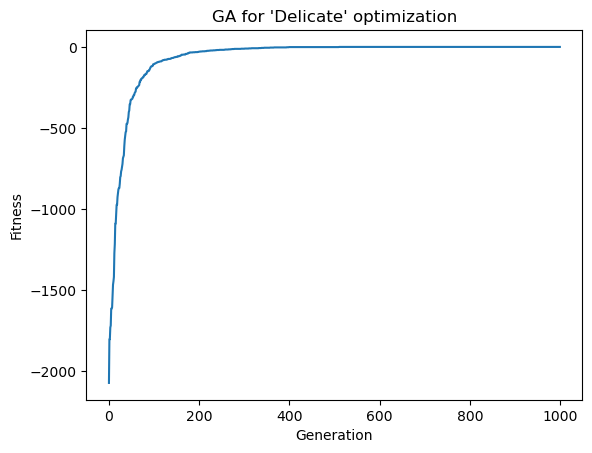

In [6]:
best_outputs = []
generations = 1000
for generation in range(generations):
    print("Generation : ", generation)
    # Measuring the fitness of each chromosome in the population.
    fitness = cal_pop_fitness(Optimization_goal, new_population_combined)
    print("Fitness")
    print(fitness)

    best_outputs.append(numpy.max(fitness))
    
    print("Best result : ", numpy.max(fitness))
    if (numpy.max(fitness) == 0):
        print("Complete!")
    
    parents = select_mating_pool(new_population_combined, fitness, 
                                      mating_size)
    print("Parents")
    print(parents)

    offspring_X = crossover(parents,
                                    offspring_size=(pop_size[0]-parents.shape[0], num_weights))
    print("Crossover")
    print(offspring_X)

    offspring_mutation = mutation(offspring_X, num_mutations=1)
    #print("Mutation")
    #print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    new_population_combined[0:parents.shape[0], :] = parents
    new_population_combined[parents.shape[0]:, :] = offspring_mutation
    
# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(Optimization_goal, new_population_combined)
# Then return the index of that solution corresponding to the best fitness.
best_match_index = numpy.where(fitness == numpy.max(fitness))


print("Best solution : ", new_population_combined[best_match_index, :])
print("Best best_max_index: ", best_match_index)
print("Best solution fitness : ", fitness[best_match_index])


import matplotlib.pyplot
matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.title("GA for 'Delicate' optimization")
matplotlib.pyplot.xlabel("Generation")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()

In [54]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
import umap.umap_ as umap
import sklearn.cluster as cluster
import time
import plotly.io as plt_io
import plotly.graph_objects as go
%matplotlib inline
import hdbscan

In [55]:
df = pd.DataFrame(new_population_combined)
df

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,7,1,5,6,4,8,1,5,6,4,...,3,1,5,6,4,1,7,2,3,11
1,7,1,5,6,4,8,1,5,6,4,...,3,1,5,6,4,1,7,2,3,11
2,7,1,5,6,4,8,1,5,6,4,...,3,1,5,6,4,1,7,2,3,11
3,7,1,5,6,4,8,1,5,6,4,...,3,1,5,6,4,1,7,2,3,11
4,7,1,5,6,4,8,1,5,6,4,...,3,1,5,6,4,1,7,2,3,11
5,7,1,5,6,4,8,1,5,6,4,...,3,1,5,6,4,1,7,2,3,11
6,7,1,5,6,4,8,1,5,6,4,...,3,1,5,6,4,1,7,2,3,11
7,7,1,5,6,4,8,1,5,6,4,...,3,1,5,6,4,1,7,2,3,11
8,7,1,5,6,4,8,1,5,6,4,...,3,1,5,6,4,1,7,2,3,11
9,7,1,5,6,4,8,1,5,6,4,...,3,1,5,6,4,1,7,2,3,11


In [56]:
clusterable_embedding = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    random_state=42,
    #densmap=True
).fit_transform(new_population_combined)

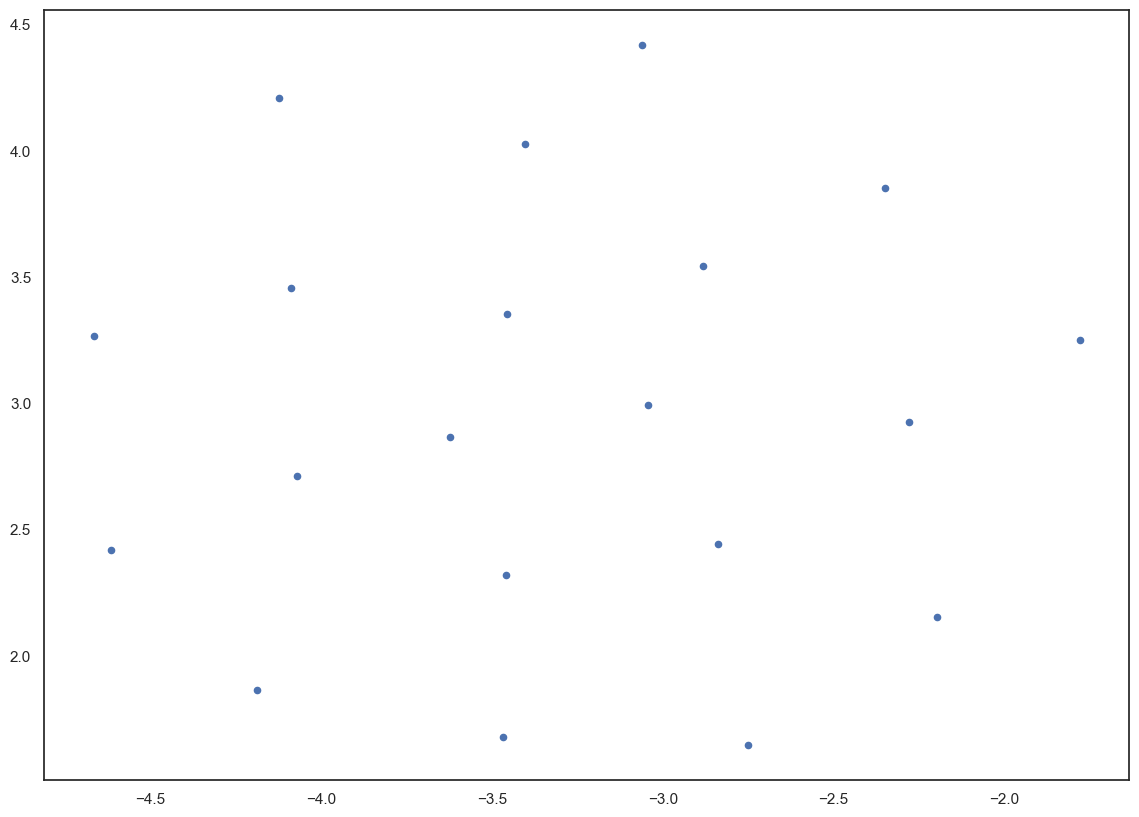

In [57]:
plt.scatter(clusterable_embedding[:,0], clusterable_embedding[:,1], s= 20)


In [16]:
Optimization_goal = [7, 1, 5, 6, 4, 
                     8, 1, 5, 6, 4, 
                     19, 1, 4, 6, 5, 
                     6, 1, 6, 2, 5, 
                     8, 6, 5, 1, 4, 
                     8, 1, 5, 6, 4, 
                     13, 6, 5, 4, 1, 
                     17, 6, 4, 1, 5, 
                     1, 1, 5, 6, 4, 
                     1, 1, 4, 6, 4, 
                     24, 1, 6, 3, 5, 
                     13, 1, 2, 6, 4, 
                     7, 1, 4, 6, 4, 
                     3, 1, 5, 6, 4, 
                     1, 7, 2, 3, 11]


num_weights = 75

population_size = 20
mating_size = 5

pop_size = (population_size, num_weights)
new_population_gene1 = numpy.random.randint(low=0, high=24, size=(population_size, 1))
new_population_gene2 = numpy.random.randint(low=0, high=12, size=(population_size, 4))
new_population_combined = numpy.hstack((new_population_gene1, new_population_gene2))

# Loop 15 times to add 70 more columns, 5 columns at a time
for i in range(14):
    new_population_gene1a = numpy.random.randint(low=0, high=24, size=(population_size, 1))
    new_population_gene2a = numpy.random.randint(low=0, high=12, size=(population_size, 4))
    additional_genes = numpy.hstack((new_population_gene1a, new_population_gene2a))
    new_population_combined = numpy.hstack((new_population_combined, additional_genes))

    
print(new_population_combined[0:5])

[[ 9  5  4  7  0  7  3  6  9 11 18  5  4  9  9  9 10  3  6  7  6  9 10  3
   3 13  8  8  9 10 12  5  7  6  7  7 10  5 10  1 10  8  3  3  7  0  0  5
   2  8 16  7  8  8  5  7  1  2  7  7  2 11  8  8 10 11  2  0  8  2  5  2
   2  6  8]
 [15  7  5  5  2 11  1  4  3 10 16  6  5  7  8  1  5  2  2  6  4  8  2  3
   4  7 11  9  4  8 19  1  2  8  0  4  7  4  4  2 20  4  9  6  0 11  8  6
   7  5  6  8  5 10  6 17 10  3  3 10  7  2 11  3  3  4 11  0  6 11 16 11
   9  1  8]
 [ 7 11  1  1  6  3  1  7  5  5  2  7  1 10  3  1  8 10 10  5 11  8  8  2
   1 15  5  7  7  0 11  4  6  9  4 23  7 11  1  0  4  7  4  4  7 16  9 11
   6  9 14  7  8  8  7  6  5 11  8  1 18  0 11  4  2 10  1  5  9  0  0  0
   5  2  7]
 [12  5  5  7  9 11  6  4  7  8  1 11  5  5  8 18 10  7  1 11 19  4  4  3
   5  2  9  9  8  2 18  2  2  3  6 19 11  4 11  4 13  8 10  1  8 19  7 10
  11  1  2 11  0  9  2 20  3  1  7  9  4  3  4  5  2  3  4  7  0  8  8  7
   0  8  2]
 [ 1 10  0  1 11 10  2  2  9  1  9  6 11  8  0  3  7  6  9  0 21

In [19]:
num_generations = []

In [44]:
for i in range(500):


    pop_size = (population_size, num_weights)
    new_population_gene1 = numpy.random.randint(low=0, high=24, size=(population_size, 1))
    new_population_gene2 = numpy.random.randint(low=0, high=12, size=(population_size, 4))
    new_population_combined = numpy.hstack((new_population_gene1, new_population_gene2))

# Loop 15 times to add 70 more columns, 5 columns at a time
    for i in range(14):
        new_population_gene1a = numpy.random.randint(low=0, high=24, size=(population_size, 1))
        new_population_gene2a = numpy.random.randint(low=0, high=12, size=(population_size, 4))
        additional_genes = numpy.hstack((new_population_gene1a, new_population_gene2a))
        new_population_combined = numpy.hstack((new_population_combined, additional_genes))

    for generation in range(generations):
        #print("Generation : ", generation)
        # Measuring the fitness of each chromosome in the population.
        fitness = cal_pop_fitness(Optimization_goal, new_population_combined)
        #print("Fitness")
        #print(fitness)

        best_outputs.append(numpy.max(fitness))

        #print("Best result : ", numpy.max(fitness))
        if (numpy.max(fitness) == 0):
            num_generations.append(generation)
            print("Complete!")
            break

        parents = select_mating_pool(new_population_combined, fitness, 
                                          mating_size)
        #print("Parents")
        #print(parents)

        offspring_X = crossover(parents,
                                        offspring_size=(pop_size[0]-parents.shape[0], num_weights))
        #print("Crossover")
        #print(offspring_X)

        offspring_mutation = mutation(offspring_X, num_mutations=1)
        #print("Mutation")
        #print(offspring_mutation)

        # Creating the new population based on the parents and offspring.
        new_population_combined[0:parents.shape[0], :] = parents
        new_population_combined[parents.shape[0]:, :] = offspring_mutation
        
print(num_generations)

Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!
Complete!


In [45]:
len(num_generations)

2471

In [46]:
count = 0
for i in range(len(num_generations)):
    if num_generations[i] == 0:
        count += 1

print(count)

500


In [49]:
num_generations = num_generations[500:]

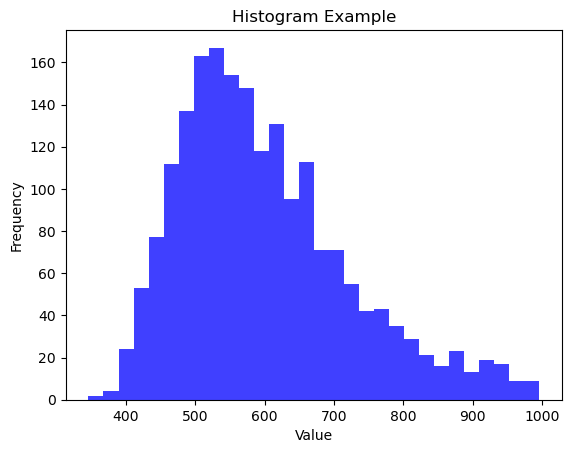

In [51]:
import matplotlib.pyplot as plt

# Generating a sample data set

# Plotting the histogram
plt.hist(num_generations, bins=30, alpha=0.75, color='blue')

plt.title('Histogram Example')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [63]:
data_np = numpy.array(num_generations)

# Log-transform the data
log_data = numpy.log(data_np)

# Calculate mean and standard deviation of the log-transformed data
mu = numpy.mean(log_data)
sigma = numpy.std(log_data)

# Calculate mean, mode, and standard deviation of the original data assuming a log-normal distribution
mean_log_normal = numpy.exp(mu + sigma**2 / 2)
mode_log_normal = numpy.exp(mu - sigma**2)
# For the standard deviation, we use the formula for a log-normal distribution
std_dev_log_normal = (numpy.exp(sigma**2) - 1) * numpy.exp(2*mu + sigma**2)**0.5

print(f"Mean (Log-Normal): {mean_log_normal}")
print(f"Mode (Log-Normal): {mode_log_normal}")
print(f"Standard Deviation (Log-Normal): {std_dev_log_normal}")

Mean (Log-Normal): 599.7491287850913
Mode (Log-Normal): 565.5729243286368
Standard Deviation (Log-Normal): 23.923909119069332


In [64]:
df2 = pd.DataFrame(new_population_combined_initial)
df2

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,22,2,6,7,1,16,0,8,3,0,...,5,6,9,8,9,1,5,11,7,2
1,2,10,0,8,4,19,2,0,9,5,...,0,9,4,3,5,2,6,11,7,1
2,17,6,9,11,8,1,8,10,9,2,...,17,11,3,8,6,16,0,0,5,3
3,16,11,5,8,6,11,2,4,4,8,...,13,5,9,7,10,1,6,5,11,11
4,12,10,3,3,2,12,1,6,9,4,...,16,7,4,0,11,12,6,11,2,9
5,12,1,8,4,10,9,11,2,11,2,...,15,0,10,1,9,13,10,7,8,6
6,11,4,2,7,1,4,11,1,11,7,...,20,9,10,4,3,0,2,4,3,10
7,20,11,3,3,8,2,5,1,3,4,...,4,11,0,2,0,9,0,9,0,5
8,3,4,8,8,5,11,4,7,0,1,...,7,8,7,5,4,12,11,7,6,3
9,12,3,7,4,8,0,4,8,7,3,...,14,1,9,2,7,19,1,4,1,7


In [65]:
clusterable_embedding_initial = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    random_state=42,
    #densmap=True
).fit_transform(new_population_combined_initial)

NameError: name 'umap' is not defined

In [66]:
plt.scatter(clusterable_embedding_initial[:,0], clusterable_embedding_initial[:,1], s= 20)


NameError: name 'clusterable_embedding_initial' is not defined

In [60]:
Combined_pop = pd.concat([df,df2], ignore_index=True)


NameError: name 'df' is not defined

In [61]:
hdbscan_labels = hdbscan.HDBSCAN(
    min_samples=2,
).fit_predict(Combined_pop)

NameError: name 'hdbscan' is not defined

In [78]:
clusterable_embedding_combined = umap.UMAP(
    n_neighbors=20,
    min_dist=0.1,
    n_components=3,
    random_state=40,
    #densmap=True
).fit_transform(Combined_pop)

In [79]:
kmeans_labels = cluster.KMeans(n_clusters=2).fit_predict(Combined_pop)

/Users/alexwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


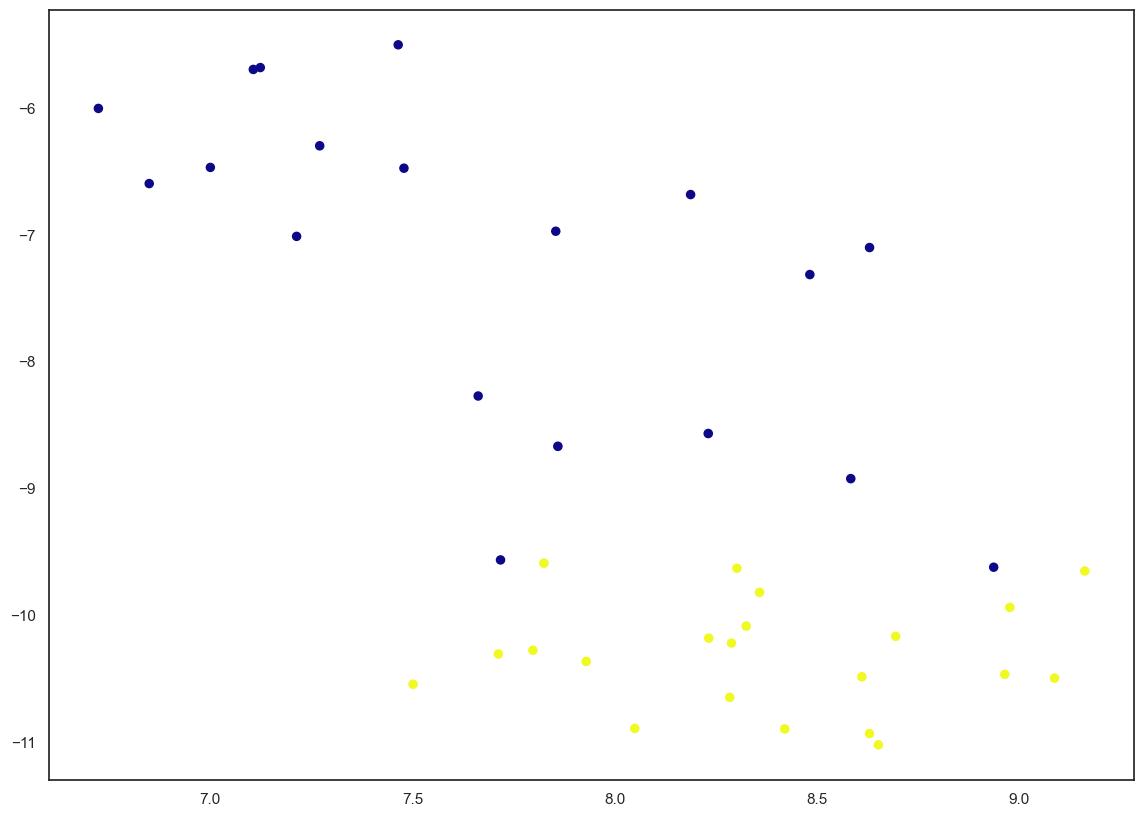

In [82]:
plt.scatter(clusterable_embedding_combined[:,0], clusterable_embedding_combined[:,1], s= 30, c=kmeans_labels, cmap = "plasma")

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

import sklearn as sk
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA

In [59]:
pca = PCA(n_components=3)
Combined_pop_R = pca.fit(Combined_pop).transform(Combined_pop)


print("Explained Variance Ratio (first three components): %s"
    % str(pca.explained_variance_ratio_))
print("Total Variance Captured: ", np.around(sum(pca.explained_variance_ratio_)*100,2),"%")



NameError: name 'Combined_pop' is not defined